In [64]:
import numpy as np
c_w = 4186
m_w =997e-3 * 300e-3
T_wb = np.mean(np.array([20.8, 21.0, 21.1, 20.9, 21.2, 20.8, 24.6])) + 273
m_m = np.array([199.32, 145.7, 50.3, 150.0, 250, 150, 300]) / 1000
T_mb = 68.5 + 273
def eind_temperatuur(m_m, c_m):
    return (c_w*m_w* T_wb + c_m *m_m *T_mb) / (c_w*m_w + c_m * m_m)

In [65]:
from scipy.optimize import curve_fit
T_delta = np.array([3.4, 2.8, 0.3, 2.9, 4.2, 4.0, 4.4])
T_e = T_wb + T_delta
values_cm, covariance_cm = curve_fit(eind_temperatuur, m_m, T_e, p0=[500])
print("Soortelijke warmte van het materiaal is gelijk aan: %.0f J/kgK"%(values_cm[0]))

Soortelijke warmte van het materiaal is gelijk aan: 505 J/kgK


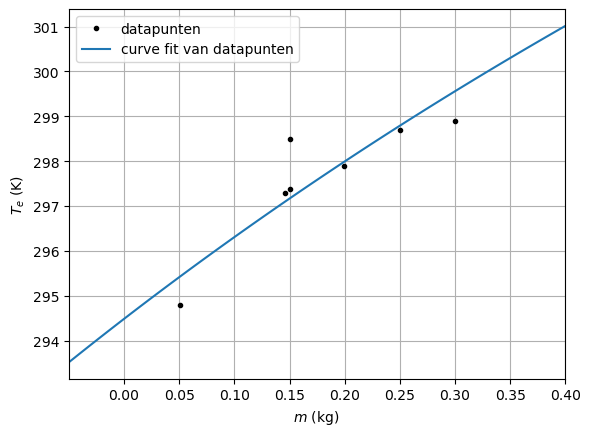

In [66]:
import matplotlib.pyplot as plt
plt.plot(m_m, T_e, 'k.', label='datapunten')
m_rand = np.linspace(min(m_m)-0.1, max(m_m)+0.1, 50)
plt.plot(m_rand, eind_temperatuur(m_rand, values_cm[0]), label='curve fit van datapunten')
plt.xlim(min(m_m)-0.1, max(m_m)+0.1)
plt.grid()
plt.xlabel("$m$ (kg) ")
plt.ylabel("$T_e$ (K)")
plt.legend(loc='upper left')
plt.show()

In [68]:
T_b = 19.1
T_e = 20.1
U = 11.8
I = 1.21
V = 420e-3
m_w = V * 997e-3
t = 105 
delta_T = T_e - T_b 
Q = U*I * t
def soortelijke_warmte(m, Q):
    return Q / (m * delta_T)
print('De soortelijke warmte van water is %.0f J/KgK' %(soortelijke_warmte(m_w, Q)))
print("Kunnen geen grafiek maken van de hoeveelheid water tegen over de het verschil temperatuur door hoeveelheid datapunten")

De soortelijke warmte van water is 3580 J/KgK
Kunnen geen grafiek maken van de hoeveelheid water tegen over de het verschil temperatuur door hoeveelheid datapunten
